## Ví dụ 1: Áp suất khí quyển 

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 
               204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,
               28.49,27.76,29.04,29.88,30.06]]).T

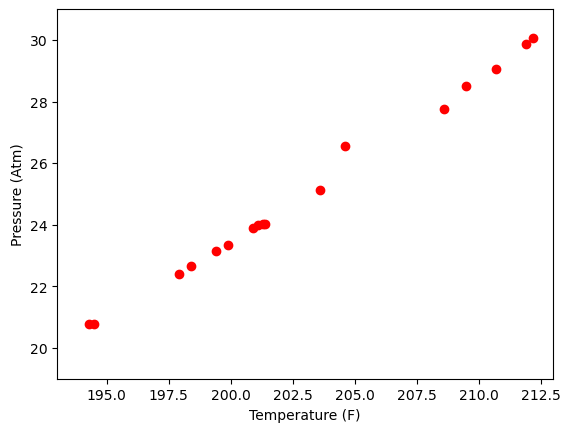

In [3]:
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [4]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

In [5]:
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-81.06372713]
 [  0.5228924 ]]


In [6]:
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

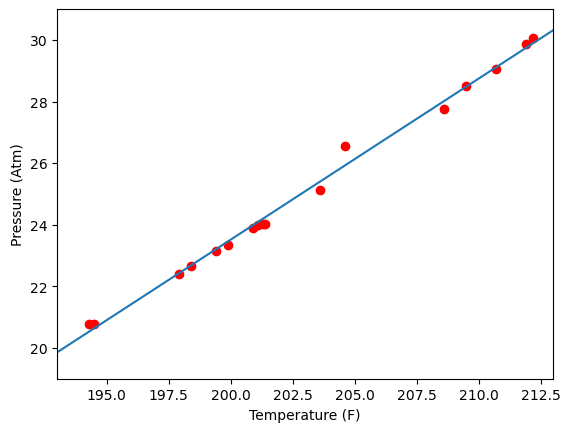

In [7]:
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

## Ví dụ 2: Tiêu thụ nhiên liệu 

In [19]:
import math
import numpy as np
with open('fuel.txt') as f:
    lines = f.readlines()

In [20]:
x_data = []
y_data = []
lines.pop(0)

'"State","Drivers","FuelC","Income","Miles","MPC","Pop","Tax"\n'

In [21]:
for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

In [22]:
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [23]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]
    
    # set Q to the identity matrix
    Q = np.identity(M)
    
    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)
        
        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])
            
        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])
        
    return Q.transpose(), R

def linear_regression(x_data, y_data):
    # """
    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """
    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)
    
    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [24]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.1928445773093
                 Tax: -4.227983208329615
                Dlic: 0.4718712134419819
              Income: -0.006135330970417619
            LogMiles: 18.545274506048017


#### Sử dụng thư viện Scikit-learn

In [25]:
from sklearn import datasets, linear_model

In [29]:
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept = False)
# fit_intercept = False for calculating the bias
regr.fit(x_data, y_data)

LinearRegression(fit_intercept=False)

In [30]:
print(regr.coef_)

[[-3.74051992e+00  5.41605284e-01 -5.11305283e-03  2.18465502e+01]]


## Ví dụ 3 (Bài tập 1): 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('SAT_GPA.csv')
dataset.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = regressor.predict(X_test)

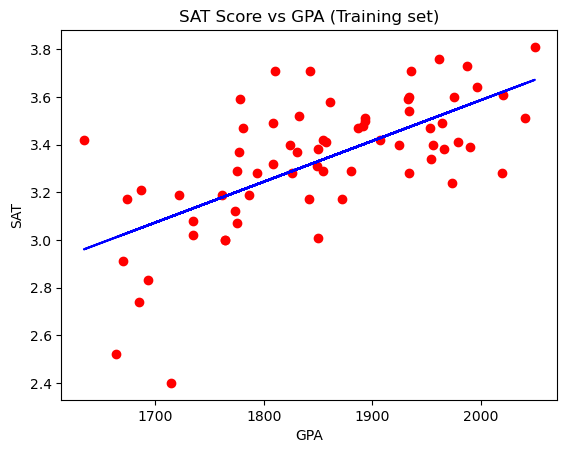

In [8]:
plt.title('SAT Score vs GPA (Training set)')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.show()

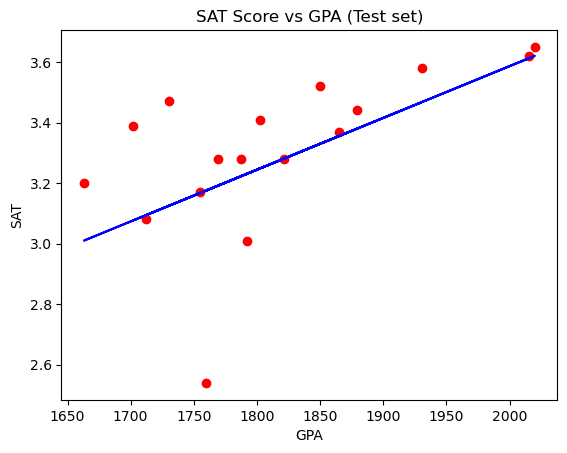

In [9]:
plt.title('SAT Score vs GPA (Test set)')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.show()

## Ví dụ 4 (Bài tập 2): 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

In [3]:
with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()

In [4]:
X_data = []
y_data = []
lines.pop(0)

'ID TUOI BMI HA GLUCOSE CHOLESTEROL BEDAYNTM\n'

In [5]:
for line in lines:
    splitted = line.replace('\n', '').split(' ')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    y_data.append([splitted[-1]])
    X_data.append([splitted[1], splitted[5], splitted[4], splitted[3], splitted[2]])

In [6]:
X_data = np.asarray(X_data)
y_data = np.asarray(y_data)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_data, y_data)

LinearRegression()

In [7]:
print(regressor.coef_)

[[-1.19965402e-17  1.00000000e+00 -4.38265550e-17 -1.98916154e-17
   1.19983116e-16]]


In [16]:
from sklearn.model_selection import train_test_split
# spilt data into 2 part: traindata and test_data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=80)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)
print(regressor.coef_)

[[ 1.29359567e-16  1.00000000e+00  2.63362162e-16 -3.68534129e-17
  -6.44467679e-17]]


## Ví dụ 5 (Bài tập 3):

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from decimal import Decimal as d
import numpy as np

In [30]:
# load data
path = "real_estate.csv"
with open(path) as f:
    lines = f.readlines()

lines.pop(0)

x_data = []
y_data = []
for line in lines:
    spiltted = line.replace("\n", "").split(",")
    spiltted.pop(0)
    spiltted = list(map(float, spiltted))
    year = spiltted[0] // 1
    y_data.append([spiltted[-1]])
    x_data.append([year,
                  spiltted[1],
                  spiltted[2],
                  spiltted[3],
                  spiltted[4],
                  spiltted[5]])
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [32]:
# setting data_train and data_test
x_train, x_vali, y_train, y_vali = train_test_split(x_data, y_data, train_size=350)

In [33]:
# buil model linear regesstion
def qr_householder(A):
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the indentify matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vertor to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
             R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i]) 

        # apply v to each column of Q
        for i in range(M): 
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])
    return Q.transpose(), R

In [34]:
def linear_regression(x_data, y_data):
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1) 
    Q, R = qr_householder(x_bars)  # QR decomposition 
    R_pinv = np.linalg.pinv(R)  # calculate inverse matrix of R 
    A = np.dot(R_pinv, Q.T)  # apply formula 
    return np.dot(A, y_data) 

In [35]:
# results
w = linear_regression(x_train, y_train)
print(w[0])
w1 = w.T.tolist() 
line = ['x0', 'x1', "x2", "x3", 'x4', 'x5', 'x6'] 
res = list(zip(line, w1[0])) 
for o in res: 
    print("{: >20}: {: >10}".format(*o)) 

[-9623.36089098]
                  x0: -9623.360890980228
                  x1: 2.7200218129653955
                  x2: -0.26091851986528536
                  x3: -0.004120006046156333
                  x4: 1.1612159414011296
                  x5: 273.1468210399129
                  x6: -21.630171467317723


In [36]:
# running model with validation data
y_pre = []
for i in x_vali:
    y_predict = [float(w[0] + w[1] * i[0] + w[2] * i[1] + w[3] * i[2] + w[4] * i[3] + w[5] * i[4] + w[6] * i[5])]
    y_pre.append(y_predict)
y_pre = np.asarray(y_pre)
print(y_pre)

[[39.37416463]
 [39.70577738]
 [44.87669921]
 [31.36151613]
 [30.21956593]
 [39.22342158]
 [40.79665337]
 [39.74335992]
 [39.82620923]
 [33.89638812]
 [46.00722813]
 [30.84839404]
 [34.10791971]
 [43.70922906]
 [50.57477853]
 [52.86205383]
 [13.34709169]
 [43.78579045]
 [46.03331998]
 [41.24344849]
 [15.02034445]
 [28.74586172]
 [33.37486169]
 [46.10830424]
 [44.48248758]
 [47.18596277]
 [35.53868767]
 [29.58943199]
 [14.76228763]
 [48.279765  ]
 [40.47356675]
 [38.68258497]
 [39.99131457]
 [46.16119062]
 [35.08898942]
 [42.65418433]
 [43.38618501]
 [34.82322417]
 [39.98634622]
 [40.31830765]
 [53.05997368]
 [45.13501936]
 [34.63169543]
 [36.90919567]
 [37.31264883]
 [39.98634622]
 [50.93094217]
 [40.0520835 ]
 [41.25767153]
 [28.21773718]
 [43.30222409]
 [40.26775916]
 [30.87448589]
 [38.21099493]
 [31.4655305 ]
 [49.52960832]
 [47.72471943]
 [38.49710135]
 [53.11215738]
 [43.59771992]
 [47.32139796]
 [15.47678654]
 [53.08606553]
 [40.64308089]]


In [37]:
# OLS
err = np.sum((y_pre - y_vali)**2)
print(err)

3190.4110929939707
